# Bayesian Multilevel Modelling using PyStan

This is a tutorial, following through Chris Fonnesbeck's [primer on using PyStan with Bayesian Multilevel Modelling](http://mc-stan.org/documentation/case-studies/radon.html).

# 3. The Bias-Variance Tradeoff

In [1]:
%pylab inline

import seaborn as sns

import clean_data

Populating the interactive namespace from numpy and matplotlib


## Modelling distribution of radon in MN

Visual inspection of the variation in (log) observed radon levels for the households shows a broad range of values.

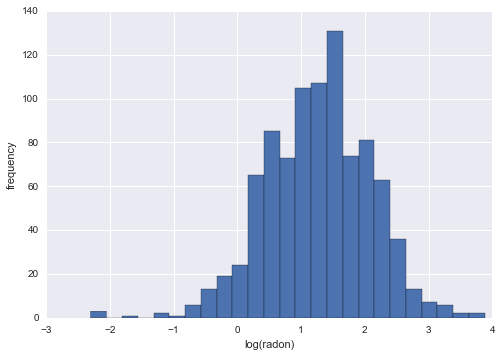

In [2]:
fig = clean_data.srrs_mn.activity.apply(lambda x: np.log(x + 0.1)).hist(bins=25)
fig.set_xlabel('log(radon)')
fig.set_ylabel('frequency');

We aim to determine which contributions of the prevailing radon level, and the floor at which radon level is measured,  produce this distribution of observed values, by modelling the relationship between those quantities and the measured radon level.

## Conventional approaches

Two conventional alternatives to modelling, *pooling* and *not pooling* represent two extremes of a [tradeoff between *variance* and *bias*](http://scott.fortmann-roe.com/docs/BiasVariance.html).

* *variance*: the difference between observations and the mean behaviour of the model
* *bias*: the difference between the mean behaviour of the model, and the mean behaviour of the "true" relationship

### The bias-variance tradeoff

Where the variable we are trying to predict is $Y$, as a function of covariates $X$, we assume a relationship $Y = f(X) + \epsilon$ where the error term $\epsilon$ is distributed normally with mean zero: $\epsilon \sim N(0, \sigma_{\epsilon})$.

We estimate a *model* $\hat{f}(X)$ of $f(X)$ using some technique. This gives us squared prediction error: $\textrm{Err}(x) = E[(Y − \hat{f}(x))^2]$. That squared error can be decomposed into:

$$\textrm{Err}(x)=(E[\hat{f} (x)] − f(x))^2 + E[(\hat{f}(x) − E[\hat{f}(x)])^2] + \sigma^2_e$$

where

* $E[\hat{f} (x)] − f(x))^2$ is the square of the difference between the model $\hat{f}(x)$ and the 'true' relationship $f(x)$, i.e. the square of the *bias*
* $E[(\hat{f}(x) − E[\hat{f}(x)])^2]$ is the square of the difference between the mean behaviour of the model and the observed behaviour of this model, i.e. the square of the *variance*
* $\sigma^2_e$ is the noise of the 'true' relationship that cannot be captured in any model, i.e. the *irreducible error*

With a known true model, and an infinite amount of data, it is in principle possible to reduce both *bias* and *variance* to zero. In reality, both sources of error exist, and we choose to minimise *bias* and/or *variance*.

### The trade-off in the radon model

Taking $y = \log(\textrm{radon})$, floor measurements (basement or ground) as $x$, where $i$ indicates the house, and $j[i]$ is the county to which a house 'belongs'. Then $\alpha$ is the radon level across all counties, and $\alpha_{j[i]}$ is the radon level in a single county; $\beta$ is the influence of the choice of floor at which measurement is made; and $\epsilon$ is some other error (measurement error, temporal variation in a house, or variation among houses).

We can take two contrasting, and extreme approaches:

* **Complete pooling** - treat all counties the same, and estimate a single radon level: $y_i = \alpha + \beta x_i + \epsilon_i$
* **No pooling** - treat each county independently: $y_i = \alpha_{j[i]} + \beta x_i + \epsilon_i$

When we do not pool, we will likely obtain quite different parameter estimates $\alpha_{j[i]}$ for each county - especially when there are few observations in a county. As new data is gathered, these estimates are likely to change radically. This is therefore a model with *high variance*.

Alternatively, by pooling all counties, we will obtain a single estimate for $\alpha$, but this value may deviate quite far from the true situation in some or all counties. This is therefore a model with *high bias*.

So, if we treat all counties as the same, we have a biased estimate, but if we treat them as individuals, we have high variance - the *bias-variance tradeoff*. It may be the case that neither extreme produces a good model for the real behaviour: models that minimise bias to produce a high variance error are *overfit*; those that minimise variance to produce a strong bias error are *underfit*.